# 1. Supervised, Semi-Supervised, and Unsupervised Learning
Ruotian Jiang
8389636738

# a
change the file name: .data to .csv

In [115]:
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
  
df = pd.read_csv('transfusion.csv',delimiter=',')
df_0 = df[df['whether he/she donated blood in March 2007']==0]
df_1 = df[df['whether he/she donated blood in March 2007']==1]
df_0_test, df_0_train =  train_test_split(df_0, train_size=0.2,shuffle = False)
df_1_test, df_1_train =  train_test_split(df_1, train_size=0.2,shuffle = False)
test = pd.concat([df_0_test , df_1_test])
train = pd.concat([df_0_train ,df_1_train])
test = test.sample(frac=1)
train = train.sample(frac=1)
# shuffle the dataset
train_X = train.iloc[:,0:4]
train_y = train.iloc[:,4:5]
test_X = test.iloc[:,0:4]
test_y = test.iloc[:,4:5]
def norm(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm
train_X = norm(train_X)
test_X = norm(test_X)
train = pd.concat([train_X , train_y] ,axis =1)
test = pd.concat([test_X , test_y],axis =1)
#  normalize the data
print train





     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
676          0.039074          -0.046085              -0.046085   
308          0.066101          -0.022829              -0.022829   
679          0.039074          -0.046085              -0.046085   
674          0.066101           0.116706               0.116706   
485          0.160696          -0.022829              -0.022829   
348         -0.001466          -0.092596              -0.092596   
209         -0.001466          -0.046085              -0.046085   
336         -0.001466          -0.046085              -0.046085   
538         -0.123088           0.070195               0.070195   
710          0.160696          -0.069340              -0.069340   
530         -0.096061           0.000427               0.000427   
489          0.133669          -0.046085              -0.046085   
575         -0.096061           0.023683               0.023683   
403          0.066101          -0.046085              -0.04608

# (b) Supervised Learning:

In [116]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics




clf = svm.LinearSVC(penalty='l1',dual=False)
parameters = {'C':np.logspace(-10, 10, num=10, base=2)}
#       he weight of the SVM penalty
grid = GridSearchCV(clf,parameters,cv=5)
grid.fit(train_X,train_y)
error = 1 - grid.score(test_X,test_y)

print error
print grid

print grid.decision_function(train_X)
grid.best_params_


0.2348993288590604
GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([9.76562e-04, 4.55675e-03, 2.12623e-02, 9.92126e-02, 4.62937e-01,
       2.16012e+00, 1.00794e+01, 4.70315e+01, 2.19454e+02, 1.02400e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
[-0.68571946 -0.69867295 -0.70102118 -0.73273151 -1.20805959 -0.53912453
 -0.47396878 -0.58108082 -0.07749753 -1.06664211 -0.12130134 -1.25631298
 -0.2455661  -0.82688658 -0.52950097 -1.11069628 -0.29776835 -0.53912453
 -0.77420332 -0.6379633  -0.44521633 -1.81603465 -1.29246941 -0.12944943
 -0.35735836 -0.70164359 -0.25814754 -0.44263746 -0.68201746 -0.5095028
 -0.09859911 -0.96558029 

{'C': 2.1601194777846118}

# for training data
Use normalized data. Report the accuracy, AUC, ROC, and confusion matrix for both training and test sets.




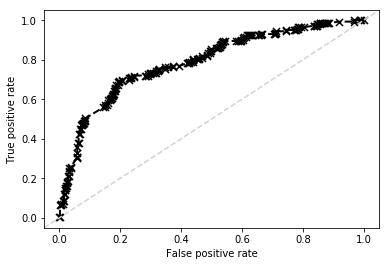

0.7889906146485095
[[449   7]
 [127  16]]
misclassification
0.22370617696160267


In [117]:
import matplotlib.pyplot as plt

y_true = train_y
y_pred = grid.predict(train_X)
y_hat = grid.decision_function(train_X)

y_hat = np.ravel(y_hat)

fprs, tprs, thresholds = metrics.roc_curve(y_true, y_hat)


plt.plot(fprs, tprs, 'k--', lw=2)
plt.scatter(fprs, tprs, c='k', marker='x', s=50)
plt.plot(np.arange(-.05, 1.05, .01), np.arange(-.05, 1.05, .01), '--', color='lightgray')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0-.05, 1+.05])
plt.ylim([0-.05, 1+.05])
plt.show()
print(metrics.roc_auc_score(train_y, y_hat))
print(metrics.confusion_matrix(y_true, y_pred))
print("misclassification")
print(1-grid.score(train_X,train_y))





# for test data 




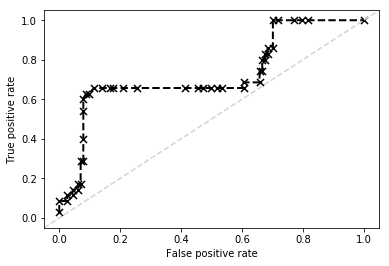

0.7259398496240601
[[110   4]
 [ 31   4]]
misclassification
0.2348993288590604


In [118]:
y_true = test_y
y_pred = grid.predict(test_X)
y_hat = grid.decision_function(test_X)

y_hat = np.ravel(y_hat)

fprs, tprs, thresholds = metrics.roc_curve(y_true, y_hat)


plt.plot(fprs, tprs, 'k--', lw=2)
plt.scatter(fprs, tprs, c='k', marker='x', s=50)
plt.plot(np.arange(-.05, 1.05, .01), np.arange(-.05, 1.05, .01), '--', color='lightgray')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0-.05, 1+.05])
plt.ylim([0-.05, 1+.05])
plt.show()
print(metrics.roc_auc_score(test_y, y_hat))
print(metrics.confusion_matrix(y_true, y_pred))
print("misclassification")
print(1-grid.score(test_X,test_y))





# (c) Semi-Supervised Learning/ Self-training:

In [142]:
train_0 = train[train['whether he/she donated blood in March 2007']==0]
train_1 = train[train['whether he/she donated blood in March 2007']==1]
train_0_part1, train_0_part2 =  train_test_split(train_0 , train_size=0.5,shuffle = True)
train_1_part1, train_1_part2 =  train_test_split(train_1 , train_size=0.5,shuffle = True)
train_part1 = pd.concat([ train_0_part1,train_1_part1])
train_part2 = pd.concat([ train_0_part2,train_1_part2])
train_labeled  = train_part1.sample(frac=1)
train_unlabelled = train_part2.sample(frac=1)


# c(i)

In [143]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
labeltrain_X = train_labeled.iloc[:,0:4]
labeltrain_y = train_labeled.iloc[:,4:5]



clf = svm.LinearSVC(penalty='l1',dual=False)

parameters = {'C':np.logspace(-10, 10, num=10, base=2)}
#       he weight of the SVM penalty
grid = GridSearchCV(clf,parameters,cv=5)
grid.fit(labeltrain_X,labeltrain_y)
print grid.best_estimator_

LinearSVC(C=0.46293735614364534, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l1', random_state=None,
     tol=0.0001, verbose=0)


# c(ii)
I should add the most confidently classified data point to your pool when doing semi-supervised learning which is the farthest point

In [180]:
def selectpoints(x,grid):
#     The desion function tells us on which side of the hyperplane generated by the
#     classifier we are (and how far we are away from it). Based on that information, 
#     the estimator then label the examples with the corresponding label.

    dist=grid.decision_function(x)
    myList=dist.tolist()
    dist=map(abs, myList)
    k = 1
    index = sorted(range(len(dist)), key=lambda k: dist[k],reverse=True)[0:k]
    #get closest point index
    return index
def judgepoint(x,grid):
    result = grid.decision_function(x)
    if result >= 0:
        return pd.DataFrame(np.array([1]),columns=['whether he/she donated blood in March 2007']) 
    else:
        return pd.DataFrame(np.array([0]),columns=['whether he/she donated blood in March 2007'])

In [181]:
unlabeltrain_X = train_unlabelled.iloc[:,0:4]

left_X = unlabeltrain_X
subtrain_X = labeltrain_X
subtrain_y = labeltrain_y 
for i in range(len(unlabeltrain_X)):
    left_X = left_X.reset_index(drop=True)
    index = selectpoints(left_X,grid)
    subtrain_X = pd.concat([subtrain_X,left_X.iloc[index]])
    subtrain_y = pd.concat([subtrain_y,judgepoint(left_X.iloc[index],grid)])
    left_X = left_X.drop(index)
    clf = svm.LinearSVC(penalty='l1',dual=False)
    parameters = {'C':np.logspace(-10, 10, num=10, base=2)}
    grid = GridSearchCV(clf,parameters,cv=5)
    grid.fit(subtrain_X,subtrain_y)
print grid.best_estimator_
    
    
    

LinearSVC(C=0.46293735614364534, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l1', random_state=None,
     tol=0.0001, verbose=0)


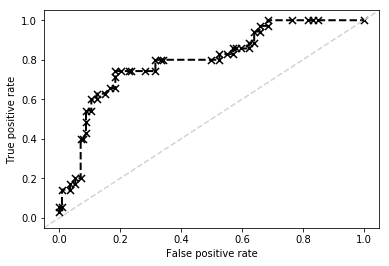

0.7983709273182958
[[114   0]
 [ 33   2]]
misclassification
0.2214765100671141


In [182]:
y_true = test_y
y_pred = grid.predict(test_X)
y_hat = grid.decision_function(test_X)

y_hat = np.ravel(y_hat)

fprs, tprs, thresholds = metrics.roc_curve(y_true, y_hat)


plt.plot(fprs, tprs, 'k--', lw=2)
plt.scatter(fprs, tprs, c='k', marker='x', s=50)
plt.plot(np.arange(-.05, 1.05, .01), np.arange(-.05, 1.05, .01), '--', color='lightgray')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0-.05, 1+.05])
plt.ylim([0-.05, 1+.05])
plt.show()
print(metrics.roc_auc_score(test_y, y_hat))
print(metrics.confusion_matrix(y_true, y_pred))
print("misclassification")
print(1-grid.score(test_X,test_y))

# (d) Unsupervised Learning:


# d(i)
we can find the average squared distances of samples to their closest cluster center is 0.0528, it means that the
algorithm was not trapped in a local minimum.

In [183]:
from sklearn.cluster import KMeans


nolabeltrain = train_X
number = len(nolabeltrain)
kmeans = KMeans(n_clusters=2, random_state=0,n_init=20).fit(nolabeltrain)
# n_init is the Number of time the k-means algorithm will be run with different centroid seeds.
print kmeans.labels_
print kmeans.cluster_centers_
print kmeans.inertia_/number


[0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 

# d(ii)
In these question, we need to balance our train dataset to avoid that we cannot figure which center is which lable becasue label 0 is dominating.

training again in balanced dataset with the method of SMOTE:

In [196]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_sample(train_X, train_y)
number = len(X_res)
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(X_res)
# n_init is the Number of time the k-means algorithm will be run with different centroid seeds.
print kmeans.labels_
print kmeans.cluster_centers_
print kmeans.inertia_/number

[0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 

In [197]:
center_0 = kmeans.cluster_centers_[0]
center_1 = kmeans.cluster_centers_[1]
# def dis(x,y):
#     return np.linalg.norm(x-y)
# print dis(nolabeltrain.iloc[0],center_1)
distance = kmeans.transform(X_res)
# use transform to get the cluster-distance space.
distance_to_0 = distance[:,0]
distance_to_1 = distance[:,1]
k = 30
index_0 = sorted(range(len(distance_to_0)), key=lambda k: distance_to_0[k],reverse=False)[0:k]
index_1 = sorted(range(len(distance_to_1)), key=lambda k: distance_to_1[k],reverse=False)[0:k]
print 'true labels of points around center 0'
print y_res[index_0]
print 'true labels of points around center 1'
print y_res[index_1]
# take a majority poll within them and the label of center 0 is 0
# take a majority poll within them and the label of center 1 is 1

true labels of points around center 0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1]
true labels of points around center 1
[1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0]


In [198]:
y_pred = kmeans.labels_
y_true = y_res
print 'accuracy' 
print(metrics.accuracy_score(y_true, y_pred))
print 'matrix'
print(metrics.confusion_matrix(y_true, y_pred))

accuracy
0.5087719298245614
matrix
[[326 130]
 [318 138]]


# b(iii)

In [199]:
test_y_pred = kmeans.predict(test_X)
test_y_true = test_y
print 'accuracy' 
print(metrics.accuracy_score(test_y_true, test_y_pred))
print 'matrix'
print(metrics.confusion_matrix(test_y_true, test_y_pred))

accuracy
0.6442953020134228
matrix
[[84 30]
 [23 12]]


# (e) Extra Practice:

#  f 
supervised learning on the full data set works no such better than semisupervised learning with half of the data set labeled. their misclassifications are almost same and the roc,auc for semisupervised learning is a litte better.
Unsupervised learning underperforms in such situations and the accuracy is very low.